In [2]:
#load cleaned data and compare with raw
import pandas as pd
import matplotlib.pyplot as plt
import os

#load both datasets
raw_df = pd.read_csv('../data/raw/all_spotify_data_20250705_222627.csv')
cleaned_files = [f for f in os.listdir('../data/processed/') if f.startswith('spotify_cleaned_')]
latest_cleaned = sorted(cleaned_files)[-1]
cleaned_df = pd.read_csv(f'../data/processed/{latest_cleaned}')

print('BEFORE vs AFTER CLEANING')
print('='*40)
print(f'Raw data: {len(raw_df):,} tracks')
print(f'Cleaned data: {len(cleaned_df):,} tracks')
print(f'Removed: {len(raw_df) - len(cleaned_df):,} tracks')

BEFORE vs AFTER CLEANING
Raw data: 1,600 tracks
Cleaned data: 1,562 tracks
Removed: 38 tracks


In [3]:
#check new features
print(f'NEW FEATURES CREATED:')
new_features = ['duration_minutes','artist_tier','popularity_category',
                'music_era','genre_count','track_age_years']

for feature in new_features:
    if feature in cleaned_df.columns:
        print(f'   {feature}')
        if cleaned_df[feature].dtype == 'object':
            print(f'     Categories: {cleaned_df[feature].value_counts().head(3).to_dict()}')
        else:
            print(f'     Range: {cleaned_df[feature].min():.1f} - {cleaned_df[feature].max():.1f}')

NEW FEATURES CREATED:
   duration_minutes
     Range: 1.0 - 21.9
   artist_tier
     Categories: {'Superstar': 1012, 'Large': 344, 'Medium': 119}
   popularity_category
     Categories: {'High': 490, 'Medium': 358, 'Viral': 251}
   music_era
     Categories: {'2010s': 568, 'Current': 396, '2000s': 269}
   genre_count
     Range: 0.0 - 7.0


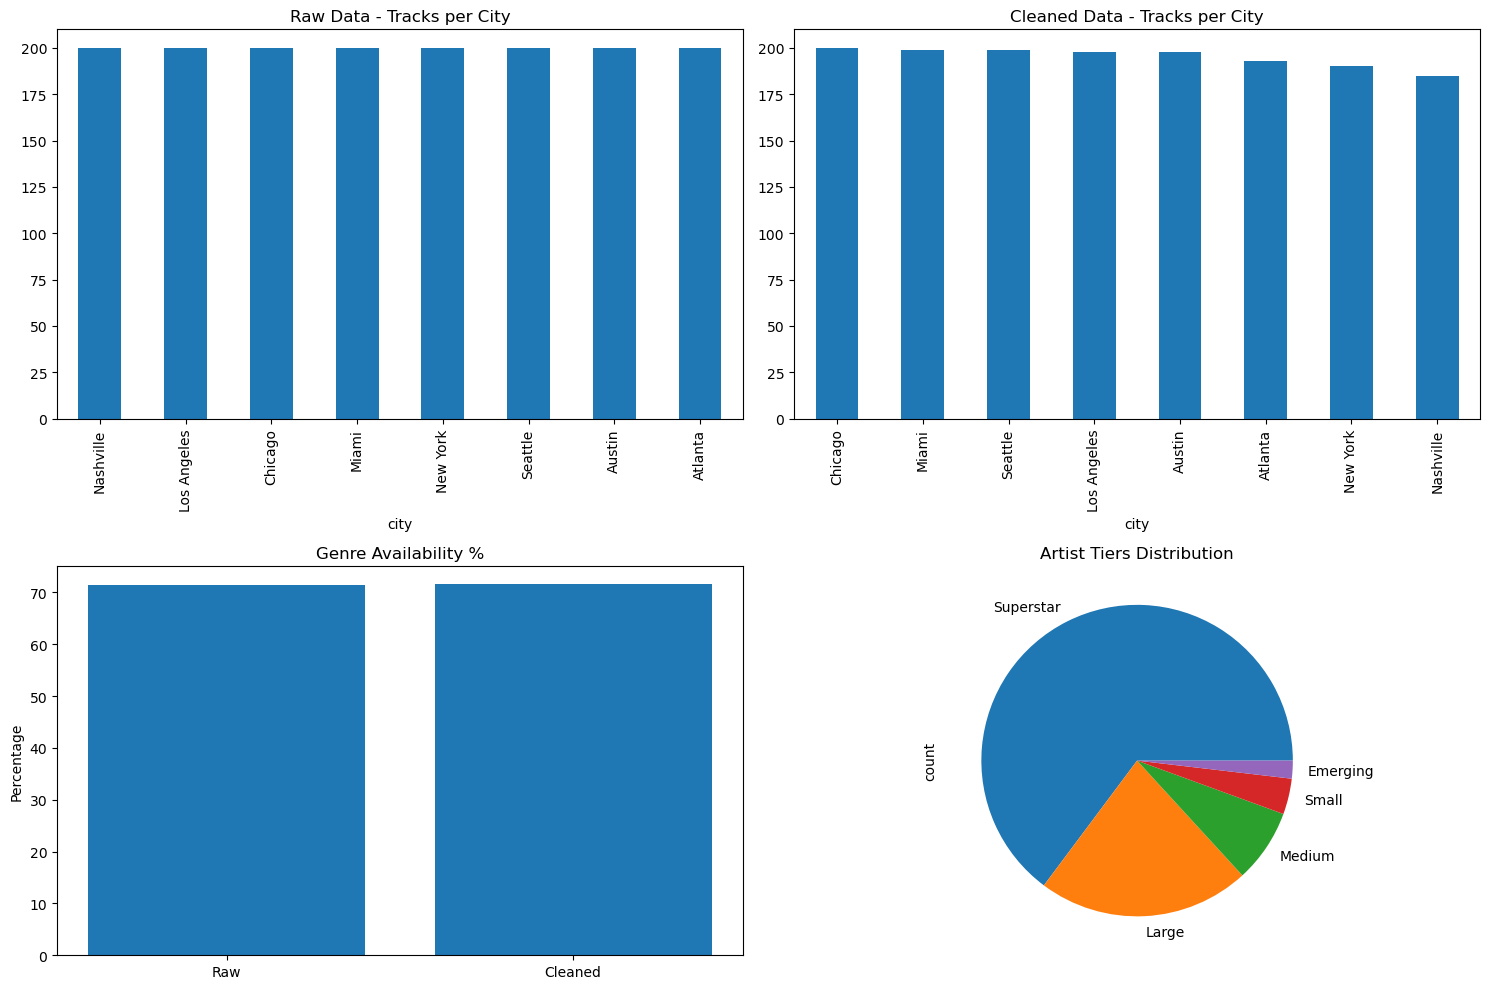


Data cleaning validation complete!


In [6]:
#visualize cleaning impact
fig, axes = plt.subplots(2,2, figsize=(15,10))

#city distribution before/after
raw_df['city'].value_counts().plot(kind='bar', ax=axes[0,0], title='Raw Data - Tracks per City')
cleaned_df['city'].value_counts().plot(kind='bar', ax=axes[0,1], title='Cleaned Data - Tracks per City')

#genre availability
raw_genre_pct = (raw_df['artist_genres'].notna().sum() / len(raw_df)) * 100
cleaned_genre_pct = (cleaned_df['artist_genres_clean'].notna().sum() / len(cleaned_df)) * 100

axes[1,0].bar(['Raw', 'Cleaned'], [raw_genre_pct, cleaned_genre_pct])
axes[1,0].set_title('Genre Availability %')
axes[1,0].set_ylabel('Percentage')

#new feature - artist tiers
cleaned_df['artist_tier'].value_counts().plot(kind='pie', ax=axes[1,1], title='Artist Tiers Distribution')

plt.tight_layout()
plt.show()

print('\nData cleaning validation complete!')